In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

### Load and consolidate 10 years of HDB resale data (from 2012 to 2021)

In [94]:
df_resale_2012_2014 = pd.read_csv("resale-flat-prices Mar 2012 to Dec 2014.csv")
df_resale_2015_2016 = pd.read_csv("resale-flat-prices Jan 2015 to Dec 2016.csv")
df_resale_2017_2021 = pd.read_csv("resale-flat-prices Jan 2017 to Aug 2021.csv")

In [95]:
df_resale_2012_2014.head() #Note that this dataset does not have the remaining_lease column

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0


In [96]:
df_resale_2015_2016.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [97]:
df_resale_2017_2021.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [98]:
# Combine 3 dataframes
df_resale = pd.concat([df_resale_2012_2014,df_resale_2015_2016,df_resale_2017_2021], ignore_index=True)

##### Notice that there are null values in "remaining-lease" as this information is only available from Jan 2015 onwards.

In [99]:
df_resale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195054 entries, 0 to 195053
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                195054 non-null  object 
 1   town                 195054 non-null  object 
 2   flat_type            195054 non-null  object 
 3   block                195054 non-null  object 
 4   street_name          195054 non-null  object 
 5   storey_range         195054 non-null  object 
 6   floor_area_sqm       195054 non-null  float64
 7   flat_model           195054 non-null  object 
 8   lease_commence_date  195054 non-null  int64  
 9   resale_price         195054 non-null  float64
 10  remaining_lease      142851 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 16.4+ MB


### Data cleaning

##### Convert month column to datetime format

In [100]:
df_resale['month'] = pd.to_datetime(df_resale['month'], format='%Y %m')

In [101]:
df_resale["flat_type"].unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE',
       'MULTI-GENERATION', '1 ROOM'], dtype=object)

In [102]:
df_resale['flat_model'].value_counts()

Model A                   60206
Improved                  49724
New Generation            29792
Premium Apartment         19969
Simplified                 9170
Apartment                  7842
Standard                   6325
Maisonette                 5662
Model A2                   2642
DBSS                       2242
Adjoined flat               336
Model A-Maisonette          334
Type S1                     322
Type S2                     158
Terrace                     126
Multi Generation             78
Premium Apartment Loft       72
Improved-Maisonette          27
Premium Maisonette           17
2-room                       10
Name: flat_model, dtype: int64

In [103]:
df_resale['storey_range'].unique()

array(['06 TO 10', '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25',
       '26 TO 30', '36 TO 40', '31 TO 35', '04 TO 06', '01 TO 03',
       '07 TO 09', '10 TO 12', '13 TO 15', '19 TO 21', '22 TO 24',
       '16 TO 18', '25 TO 27', '28 TO 30', '37 TO 39', '34 TO 36',
       '31 TO 33', '40 TO 42', '46 TO 48', '43 TO 45', '49 TO 51'],
      dtype=object)

In [104]:
df_resale['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

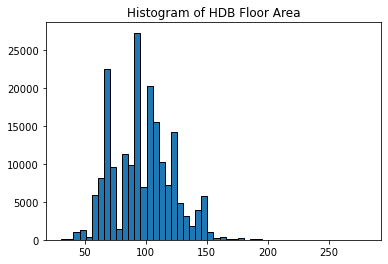

Terrace               10
Maisonette             3
Premium Maisonette     2
Name: flat_model, dtype: int64

In [105]:
plt.hist(df_resale['floor_area_sqm'], bins=50, edgecolor='black')
plt.title('Histogram of HDB Floor Area')
plt.show()
#To show flat models and their respective counts for >200sqm HDB units
df_resale[df_resale['floor_area_sqm'] > 200]['flat_model'].value_counts() 

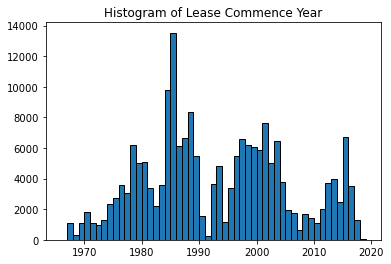

In [106]:
bins = df_resale['lease_commence_date'].max() - df_resale['lease_commence_date'].min()
plt.hist(df_resale['lease_commence_date'], bins=bins, edgecolor='black')
plt.title('Histogram of Lease Commence Year')
plt.show()

In [107]:
df_resale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195054 entries, 0 to 195053
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                195054 non-null  datetime64[ns]
 1   town                 195054 non-null  object        
 2   flat_type            195054 non-null  object        
 3   block                195054 non-null  object        
 4   street_name          195054 non-null  object        
 5   storey_range         195054 non-null  object        
 6   floor_area_sqm       195054 non-null  float64       
 7   flat_model           195054 non-null  object        
 8   lease_commence_date  195054 non-null  int64         
 9   resale_price         195054 non-null  float64       
 10  remaining_lease      142851 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 16.4+ MB


In [108]:
def years_left(text):
    if isinstance(text, str):
        yearmonth = [int(s) for s in text.split() if s.isdigit()]
        if len(yearmonth) > 1: # if there's year and month
            years = yearmonth[0] + (yearmonth[1]/12)
        else: # if only year
            years = yearmonth[0]
        return years

df_resale['remaining_lease'] = df_resale['remaining_lease'].apply(lambda x: years_left(x))

In [109]:
#Create separate column showing year of sale only
df_resale['year'] = pd.DatetimeIndex(df_resale['month']).year

C:\Users\kohjw\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\kohjw\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


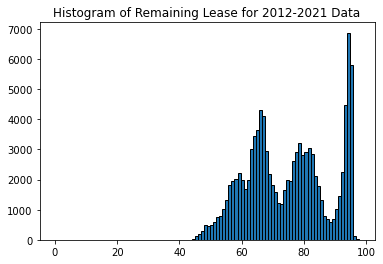

In [110]:
plt.hist(df_resale['remaining_lease'], bins=100, edgecolor='black')
plt.title('Histogram of Remaining Lease for 2012-2021 Data')
plt.show()

### Adjust for inflation using CPI data from Singstat

In [111]:
cpi = pd.read_csv("Monthly CPI housing and utilities.csv")
#Convert date column to datetime format
cpi['month'] = pd.to_datetime(cpi['month'], format='%Y %b')

In [112]:
#left join df_resale with cpi
df_resale = df_resale.merge(cpi, on='month', how='left') 

In [113]:
# Formula for adjusting resale prices: (Resale_price / CPI) * 100
df_resale['real_price'] = (df_resale['resale_price'] / df_resale['cpi']) * 100 

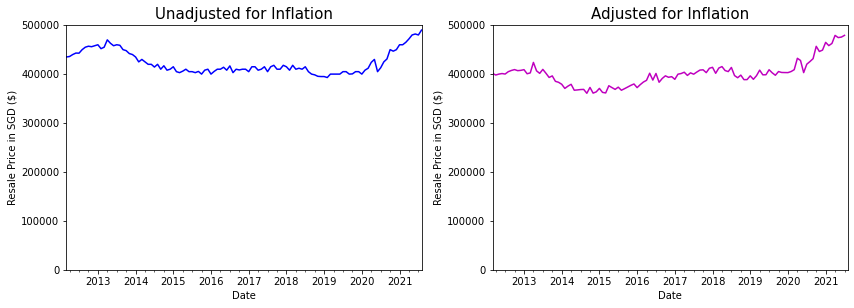

In [114]:
fig = plt.figure(figsize=(14,4.5))
ax1 = fig.add_subplot(121)
df_resale.groupby('month')[['resale_price']].median().plot(ax=ax1, color='b', legend=None)
ax1.set_xlabel('Date'), ax1.set_ylabel('Resale Price in SGD ($)'), ax1.set_ylim(0, 500000), ax1.set_title('Unadjusted for Inflation', size=15)

#Adjusted for inflation
ax2 = fig.add_subplot(122)
df_resale.groupby('month')[['real_price']].median().plot(ax=ax2, color='m', legend=None)
ax2.set_xlabel('Date'), ax2.set_ylabel('Resale Price in SGD ($)'), ax2.set_ylim(0, 500000), ax2.set_title('Adjusted for Inflation',size=15)

plt.show()

<ipython-input-115-944e5085475c>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


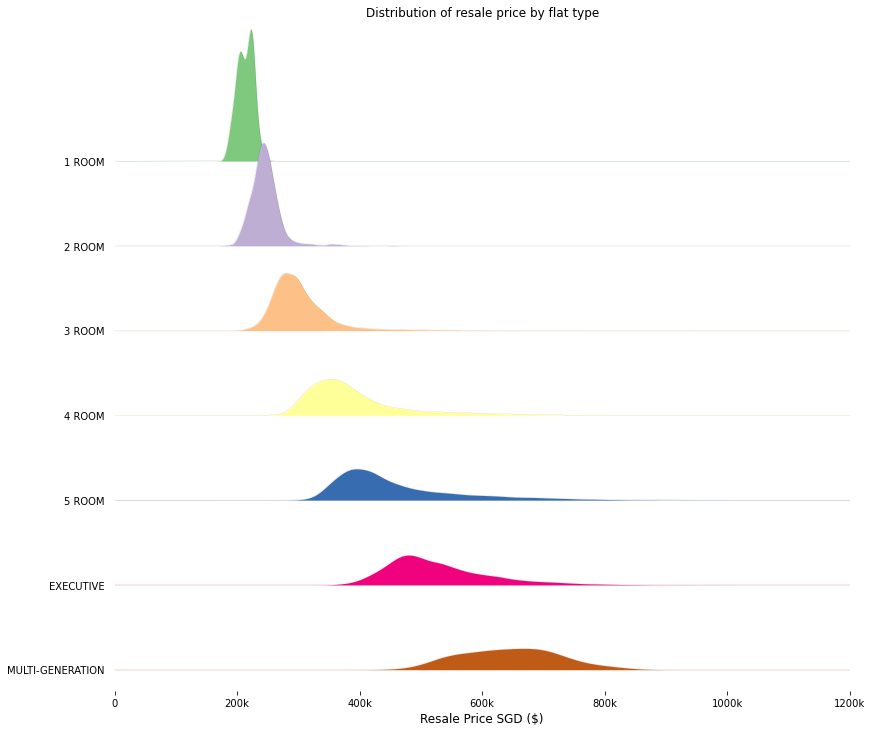

In [115]:
import joypy
fig, axes = joypy.joyplot(df_resale, by="flat_type", column="real_price",figsize=(12,10),
             linewidth=0.05,overlap=1.5,colormap=plt.cm.get_cmap('Accent'))
axes[-1].set_xlim([0,1200000])
axes[-1].set_xticklabels(['0','200k', '400k', '600k', '800k', '1000k', '1200k', '1400k'])
plt.title("Distribution of resale price by flat type")
plt.xlabel('Resale Price SGD ($)', fontsize=12)
fig.show()

From the figure above, it can be observed that 1-room flats have the narrowest range in resale prices, while larger flats and multi-generation flats have a very wide price range, which is expected. 

### Price distribution by town (violin plot)

<ipython-input-116-7056cb383142>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


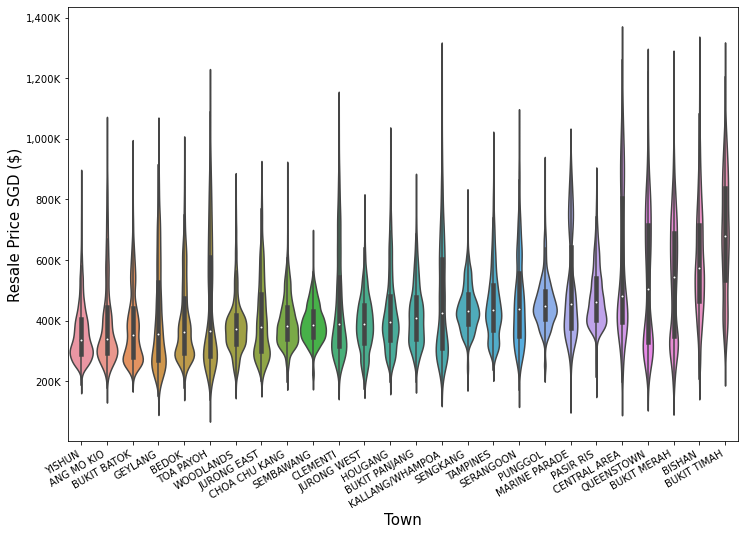

In [116]:
fig = plt.figure(figsize=(12,8))
p=sns.violinplot(x='town', y='real_price', data=df_resale, width=1,
                order=df_resale.groupby('town')['real_price'].median().sort_values().reset_index()['town'].tolist())
p.set_xticklabels(p.get_xticklabels(), rotation=30, ha='right'), p.set_xlabel('Town', size=15)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylabel('Resale Price SGD ($)', size=15)
plt.show()

### Price distribution by flat model (box and whiskers plot)

<ipython-input-117-bf758772e133>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_xticklabels(xlabels)


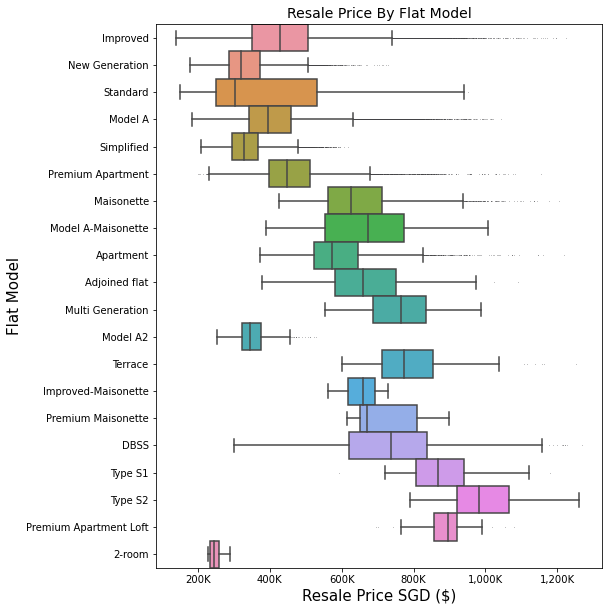

In [117]:
fig = plt.figure(figsize=(8,10))
p=sns.boxplot(y='flat_model', x='real_price', data=df_resale, width=1, orient='h', flierprops = dict(markerfacecolor = 'blue', markersize = 0.1, linestyle='none'))
p.set_xlabel('Resale Price SGD ($)', size=15)
p.set_ylabel('Flat Model', size=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_xticks()/1000]
p.set_xticklabels(xlabels)
p.set_title('Resale Price By Flat Model', size=14)
plt.show()

### Scatterplot of resale price vs floor area

<ipython-input-118-a42dc1065e40>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


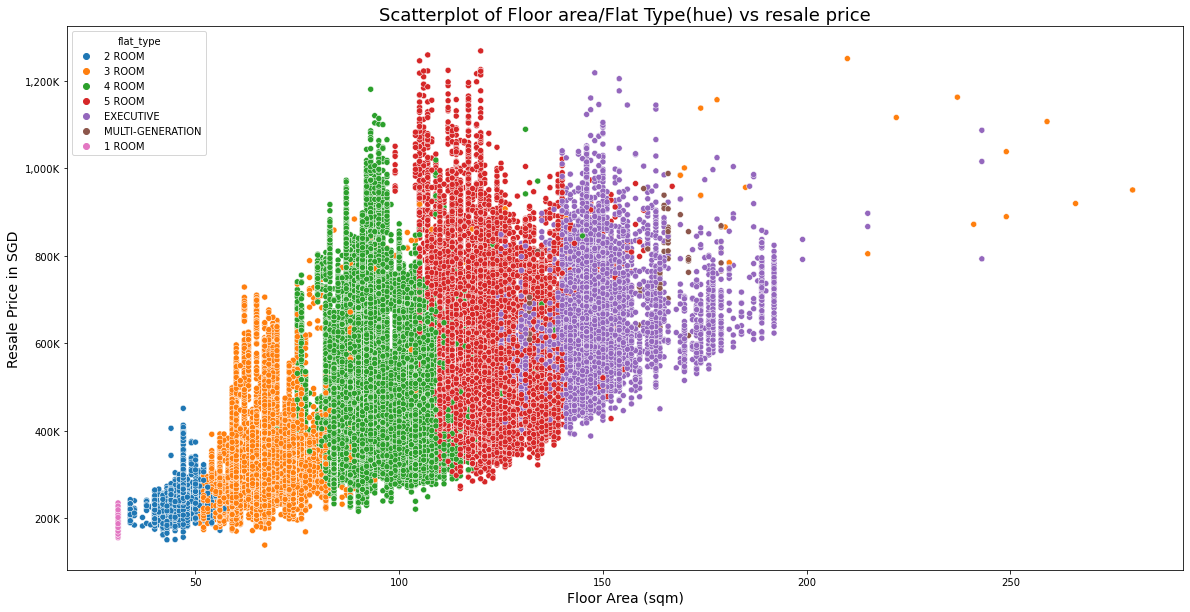

In [118]:
plt.figure(figsize=(20,10))
p=sns.scatterplot(x='floor_area_sqm', y='real_price', data=df_resale, hue = 'flat_type')
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylabel('Resale Price in SGD',size=14)
p.set_xlabel('Floor Area (sqm)',size=14)
plt.title("Scatterplot of Floor area/Flat Type(hue) vs resale price", size = 18)
plt.show()

### Find list of amenities (MRT stations, supermarkets, hawker centers, schools)

Refer to https://medium.com/@michael.wy.ong/web-scrape-geospatial-data-analyse-singapores-property-price-part-i-276caba320b

In [27]:
import requests
import json
from geopy.distance import geodesic

In [28]:
def find_postal(lst, filename):
    '''
    Using the block number and street name, get the full address of the hdb flat,
    including the postal code and geographical coordinates (lat/long)
    '''
    
    for index,add in enumerate(lst):
        url= "https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal="+ add        
        print(index,url)
        
        # Retrieve information from website
        response = requests.get(url)
        try:
            data = json.loads(response.text) 
        except ValueError:
            print('JSONDecodeError')
            pass
    
        temp_df = pd.DataFrame.from_dict(data["results"])
        # The "add" is the address that was used to search in the website
        temp_df["address"] = add
        
        # Create the file with the first row that is read in 
        if index == 0:
            file = temp_df
        else:
            file = file.append(temp_df)
    file.to_csv(filename + '.csv')

Refer to article: https://medium.com/@seinchyi/machine-learning-for-singapore-resale-hdb-pt-1-data-preparation-8cdc2df8e24f

In [29]:
def find_nearest(house, amenity, radius=2):
    """
    Find nearest locations in the 2nd table from the 1st address
    Both are dataframes with a specific format:
        1st column: any string column ie addresses
        2nd column: latitude (float)
        3rd column: longitude (float)
    It also finds the number of amenities within the given radius (default=2)
    """
    results = {}
    # first column must be address
    for index,flat in enumerate(house.iloc[:,0]):
        
        # 2nd and 3rd column must be latitude and longitude respectively
        flat_loc = (house.iloc[index,1],house.iloc[index,2])
        flat_amenity = ['','',100,0]
        for ind, eachloc in enumerate(amenity.iloc[:,0]):
            amenity_loc = (amenity.iloc[ind,1],amenity.iloc[ind,2])
            distance = round(geodesic(flat_loc,amenity_loc).km,3) #Round to 3 decimal places

            if distance <= radius:   # compute number of amenities in 2km radius
                flat_amenity[3] += 1

            if distance < flat_amenity[2]: # find nearest amenity
                flat_amenity[0] = flat
                flat_amenity[1] = eachloc
                flat_amenity[2] = distance

        results[flat] = flat_amenity
    return results

In [30]:
def dist_from_location(house, location):
    """
    Find the distance of a location from the 1st address
    First is a dataframe with a specific format:
        1st column: any string column ie addresses taken from the "find_postal_address.py"
        2nd column: latitude (float)
        3rd column: longitude (float)
    Column name doesn't matter.
    Second is tuple with latitude and longitude of location
    """
    results = {}
    # first column must be address
    for index,flat in enumerate(house.iloc[:,0]):
        
        # 2nd column must be latitude, 3rd column must be longitude
        flat_loc = (house.iloc[index,1],house.iloc[index,2])
        flat_amenity = ['',100]
        distance = geodesic(flat_loc,location)
        distance = float(str(distance)[:-3]) # convert to float
        flat_amenity[0] = flat
        flat_amenity[1] = distance
        results[flat] = flat_amenity
    return results


In [122]:
df_resale['address'] = df_resale['block'] + ' ' + df_resale['street_name']

In [123]:
df_resale.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,cpi,real_price,address
0,2012-03-01,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,NaN,2012,108.319,230799.767354,172 ANG MO KIO AVE 4
1,2012-03-01,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,NaN,2012,108.319,244647.753395,510 ANG MO KIO AVE 8
2,2012-03-01,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0,NaN,2012,108.319,290807.706866,610 ANG MO KIO AVE 4
3,2012-03-01,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0,NaN,2012,108.319,295423.702213,474 ANG MO KIO AVE 10
4,2012-03-01,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0,NaN,2012,108.319,296346.901282,604 ANG MO KIO AVE 5


In [33]:
unique_address = list(set(df_resale['address']))
print('Unique addresses:', len(unique_address))

Unique addresses: 9240


In [34]:
find_postal(unique_address, 'flat_coordinates')

0 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=622 WOODLANDS DR 52
1 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=414 CHOA CHU KANG AVE 4
2 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=177 BT BATOK WEST AVE 8
3 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=62A STRATHMORE AVE
4 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=132 CASHEW RD
5 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=204A COMPASSVALE DR
6 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=83 C'WEALTH CL
7 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=665A JURONG WEST ST 64
8 https://developers.onemap.sg/commonapi/search?returnGeo

72 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=171 ANG MO KIO AVE 4
73 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=222 SERANGOON AVE 4
74 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=437 TAMPINES ST 43
75 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=807 KING GEORGE'S AVE
76 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=442B FAJAR RD
77 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=782B WOODLANDS CRES
78 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=461 TAMPINES ST 44
79 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=121 SERANGOON NTH AVE 1
80 https://developers.onemap.sg/commonapi/search?

142 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=642 PASIR RIS DR 10
143 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=917 HOUGANG AVE 9
144 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=436 WOODLANDS ST 41
145 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=116 BT MERAH VIEW
146 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=282C SENGKANG EAST AVE
147 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=291C BT BATOK ST 24
148 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=408 YISHUN AVE 6
149 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=406 WOODLANDS ST 41
150 https://developers.onemap.sg/commonapi/s

214 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=313D ANCHORVALE RD
215 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=503C CANBERRA LINK
216 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=180D RIVERVALE CRES
217 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=373 TAMPINES ST 34
218 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=804 KING GEORGE'S AVE
219 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=349 BT BATOK ST 34
220 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=331 SERANGOON AVE 3
221 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=661A EDGEDALE PLAINS
222 https://developers.onemap.sg/commonap

283 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=471 SEGAR RD
284 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=328 SEMBAWANG CRES
285 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=907 JURONG WEST ST 91
286 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=42 BEDOK STH RD
287 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=717 JURONG WEST ST 71
288 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=443A FERNVALE RD
289 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=542 BT BATOK ST 52
290 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=545 BT PANJANG RING RD
291 https://developers.onemap.sg/commonapi/search

355 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=161 WOODLANDS ST 13
356 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=17 LOR 7 TOA PAYOH
357 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=405 SERANGOON AVE 1
358 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=706 PASIR RIS DR 10
359 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=490D CHOA CHU KANG AVE 5
360 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=17 DOVER CRES
361 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=700A ANG MO KIO AVE 6
362 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=1 TECK WHYE AVE
363 https://developers.onemap.sg/commonapi/s

426 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=168 STIRLING RD
427 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=619 BEDOK RESERVOIR RD
428 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=324D SENGKANG EAST WAY
429 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=165B PUNGGOL CTRL
430 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=156 RIVERVALE CRES
431 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=705 JURONG WEST ST 71
432 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=123 SERANGOON NTH AVE 1
433 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=166A PUNGGOL CTRL
434 https://developers.onemap.sg/comm

496 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=45 LOR 5 TOA PAYOH
497 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=890B TAMPINES AVE 1
498 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=76 LOR LIMAU
499 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=551 ANG MO KIO AVE 10
500 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=491A TAMPINES AVE 9
501 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=116 JURONG EAST ST 13
502 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=23 HOUGANG AVE 3
503 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=85 C'WEALTH CL
504 https://developers.onemap.sg/commonapi/search?re

567 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=116 HOUGANG AVE 1
568 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=278B COMPASSVALE BOW
569 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=621 SENJA RD
570 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=307 CANBERRA RD
571 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=118A JLN MEMBINA
572 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=382 TAMPINES ST 32
573 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=113 BEDOK NTH ST 2
574 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=40 CAMBRIDGE RD
575 https://developers.onemap.sg/commonapi/search?returnGeom=

637 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=11 JLN BATU
638 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=125 YISHUN ST 11
639 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=58 STIRLING RD
640 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=532 JURONG WEST ST 52
641 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=648D JURONG WEST ST 61
642 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=33 MARINE CRES
643 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=215 YISHUN ST 21
644 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=53 TELOK BLANGAH DR
645 https://developers.onemap.sg/commonapi/search?returnGeo

707 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=145 LOR AH SOO
708 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=191B RIVERVALE DR
709 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=940 TAMPINES AVE 5
710 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=472 SEMBAWANG DR
711 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=311D ANCHORVALE LANE
712 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=289C BT BATOK ST 25
713 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=29A CHAI CHEE AVE
714 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=207D COMPASSVALE LANE
715 https://developers.onemap.sg/commonapi/search?

777 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=104 BISHAN ST 12
778 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=514 WEST COAST RD
779 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=47 MOH GUAN TER
780 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=468B FERNVALE LINK
781 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=205 TOA PAYOH NTH
782 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=196A BOON LAY DR
783 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=358 TAMPINES ST 33
784 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=507 SERANGOON NTH AVE 4
785 https://developers.onemap.sg/commonapi/search?re

847 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=801D KEAT HONG CL
848 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=212 BOON LAY PL
849 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=456 PASIR RIS DR 4
850 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=769 YISHUN AVE 3
851 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=714 TAMPINES ST 71
852 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=659 JLN TENAGA
853 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=530B PASIR RIS DR 1
854 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=21 GHIM MOH RD
855 https://developers.onemap.sg/commonapi/search?returnGeom=

916 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=120 MCNAIR RD
917 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=310 SHUNFU RD
918 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=336D ANCHORVALE CRES
919 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=1 TOH YI DR
920 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=192 BISHAN ST 13
921 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=432D YISHUN AVE 1
922 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=640 YISHUN ST 61
923 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=9 MARSILING DR
924 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDe

989 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=357 ADMIRALTY DR
990 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=252 BANGKIT RD
991 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=127 HOUGANG AVE 1
992 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=202 CHOA CHU KANG AVE 1
993 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=460 CLEMENTI AVE 3
994 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=517 CHOA CHU KANG ST 51
995 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=816 JURONG WEST ST 81
996 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=137 PETIR RD
997 https://developers.onemap.sg/commonapi/searc

1058 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=406 HOUGANG AVE 10
1059 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=934 JURONG WEST ST 91
1060 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=227C COMPASSVALE DR
1061 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=125 KIM TIAN RD
1062 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=691B CHOA CHU KANG CRES
1063 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=305B ANCHORVALE LINK
1064 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=345 CLEMENTI AVE 5
1065 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=421 ANG MO KIO AVE 10
1066 https://developers.onema

1126 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=644 JURONG WEST ST 61
1127 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=152 RIVERVALE CRES
1128 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=269C QUEEN ST
1129 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=640 BEDOK RESERVOIR RD
1130 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=116 PASIR RIS ST 11
1131 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=106 BEDOK NTH AVE 4
1132 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=780A WOODLANDS CRES
1133 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=437 YISHUN AVE 6
1134 https://developers.onemap.sg/com

1198 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=553 CHOA CHU KANG NTH 6
1199 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=494B TAMPINES AVE 9
1200 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=259C PUNGGOL FIELD
1201 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=731 JURONG WEST ST 72
1202 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=177 YUNG SHENG RD
1203 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=424 WOODLANDS ST 41
1204 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=518C TAMPINES CTRL 7
1205 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=741 PASIR RIS ST 71
1206 https://developers.onem

1268 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=46 SENG POH RD
1269 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=547 WOODLANDS DR 16
1270 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=534 SERANGOON NTH AVE 4
1271 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=478 SEMBAWANG DR
1272 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=150A BISHAN ST 11
1273 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=350A CANBERRA RD
1274 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=579 HOUGANG AVE 4
1275 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=94E BEDOK NTH AVE 4
1276 https://developers.onemap.sg/commonapi

1337 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=713 CLEMENTI WEST ST 2
1338 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=291B COMPASSVALE ST
1339 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=155 JLN TECK WHYE
1340 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=832 TAMPINES ST 82
1341 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=320 UBI AVE 1
1342 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=88 BEDOK NTH ST 4
1343 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=12 DOVER CL EAST
1344 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=226 ANG MO KIO AVE 1
1345 https://developers.onemap.sg/commonap

1406 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=228 LOR 8 TOA PAYOH
1407 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=969 HOUGANG ST 91
1408 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=504D MONTREAL DR
1409 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=408 JURONG WEST ST 42
1410 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=120 ANG MO KIO AVE 3
1411 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=154 BISHAN ST 13
1412 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=209 PASIR RIS ST 21
1413 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=39 TELOK BLANGAH RISE
1414 https://developers.onemap.sg/c

1475 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=284 TOH GUAN RD
1476 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=596D ANG MO KIO ST 52
1477 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=723 PASIR RIS ST 72
1478 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=301 CLEMENTI AVE 4
1479 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=491C TAMPINES ST 45
1480 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=666A YISHUN AVE 4
1481 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=514 SERANGOON NTH AVE 4
1482 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=410A FERNVALE RD
1483 https://developers.onemap.sg/co

1544 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=706 WOODLANDS DR 40
1545 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=239 COMPASSVALE WALK
1546 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=511 JURONG WEST ST 52
1547 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=312 UBI AVE 1
1548 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=173 LOR 1 TOA PAYOH
1549 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=459 YISHUN AVE 11
1550 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=125 BISHAN ST 12
1551 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=942 HOUGANG ST 92
1552 https://developers.onemap.sg/commonap

1613 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=186 PASIR RIS ST 11
1614 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=613D PUNGGOL DR
1615 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=320 WOODLANDS ST 32
1616 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=446 PASIR RIS DR 6
1617 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=507 PASIR RIS ST 52
1618 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=211 CHOA CHU KANG CTRL
1619 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=719 TAMPINES ST 72
1620 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=389 BT BATOK WEST AVE 5
1621 https://developers.onemap.

1682 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=659 WOODLANDS RING RD
1683 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=861 TAMPINES AVE 5
1684 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=487C TAMPINES ST 45
1685 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=7 LOR 7 TOA PAYOH
1686 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=104 BEDOK RESERVOIR RD
1687 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=221 ANG MO KIO AVE 1
1688 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=308 CLEMENTI AVE 4
1689 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=604 ELIAS RD
1690 https://developers.onemap.sg/com

1751 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=791 YISHUN AVE 2
1752 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=160 PASIR RIS ST 13
1753 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=185 BISHAN ST 13
1754 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=333A YISHUN ST 31
1755 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=939 TAMPINES AVE 5
1756 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=278A COMPASSVALE BOW
1757 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=265B COMPASSVALE LINK
1758 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=157 TAMPINES ST 12
1759 https://developers.onemap.sg/commo

1821 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=248 BISHAN ST 22
1822 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=503 HOUGANG AVE 8
1823 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=23 SIN MING RD
1824 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=698C HOUGANG ST 52
1825 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=107 BEDOK RESERVOIR RD
1826 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=14 TELOK BLANGAH CRES
1827 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=37 CIRCUIT RD
1828 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=758 CHOA CHU KANG NTH 5
1829 https://developers.onemap.sg/common

1890 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=18 LOR 7 TOA PAYOH
1891 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=883 TAMPINES ST 84
1892 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=112 EDGEFIELD PLAINS
1893 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=648 ANG MO KIO AVE 5
1894 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=238 CHOA CHU KANG CTRL
1895 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=355 BT BATOK ST 31
1896 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=12 KG ARANG RD
1897 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=140 TAMPINES ST 12
1898 https://developers.onemap.sg/co

1959 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=65 NEW UPP CHANGI RD
1960 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=119 BT MERAH VIEW
1961 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=140 BT BATOK ST 11
1962 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=613 WOODLANDS AVE 4
1963 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=635 JURONG WEST ST 65
1964 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=445 ANG MO KIO AVE 10
1965 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=538 ANG MO KIO AVE 5
1966 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=260 BT BATOK EAST AVE 4
1967 https://developers.o

2029 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=94 WHAMPOA DR
2030 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=452 FAJAR RD
2031 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=470B FERNVALE LINK
2032 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=150 BT BATOK ST 11
2033 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=112 ANG MO KIO AVE 4
2034 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=548B SEGAR RD
2035 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=94 GEYLANG BAHRU
2036 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=546 JURONG WEST ST 42
2037 https://developers.onemap.sg/commonapi/search?re

2099 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=77 INDUS RD
2100 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=313 ANG MO KIO AVE 3
2101 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=945 HOUGANG ST 92
2102 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=344 CHOA CHU KANG LOOP
2103 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=542 JELAPANG RD
2104 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=510 ANG MO KIO AVE 8
2105 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=708 TAMPINES ST 71
2106 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=939 HOUGANG ST 92
2107 https://developers.onemap.sg/commonapi/

2169 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=708 PASIR RIS DR 10
2170 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=440 HOUGANG AVE 8
2171 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=727 TAMPINES ST 71
2172 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=467 TAMPINES ST 44
2173 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=181B BOON LAY DR
2174 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=668 WOODLANDS RING RD
2175 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=75 WHAMPOA DR
2176 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=272 YISHUN ST 22
2177 https://developers.onemap.sg/commonapi/se

2240 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=282 CHOA CHU KANG AVE 3
2241 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=544 CHOA CHU KANG ST 52
2242 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=682 RACE COURSE RD
2243 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=14 TECK WHYE LANE
2244 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=729 TAMPINES ST 71
2245 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=629 HOUGANG AVE 8
2246 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=100 BEDOK NTH AVE 4
2247 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=423 ANG MO KIO AVE 3
2248 https://developers.onema

2309 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=535 BT PANJANG RING RD
2310 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=183 PASIR RIS ST 11
2311 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=578 ANG MO KIO AVE 10
2312 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=17 EUNOS CRES
2313 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=979A BUANGKOK CRES
2314 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=141 JLN BT MERAH
2315 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=321 YISHUN CTRL
2316 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=7 JLN BATU
2317 https://developers.onemap.sg/commonapi/search

2378 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=33 JLN BAHAGIA
2379 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=446B JLN KAYU
2380 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=330B ANCHORVALE ST
2381 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=508 WEST COAST DR
2382 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=7 MARINE TER
2383 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=183 STIRLING RD
2384 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=182 BEDOK NTH RD
2385 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=504B MONTREAL DR
2386 https://developers.onemap.sg/commonapi/search?returnGeom=Y

2448 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=731 YISHUN ST 72
2449 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=223 PENDING RD
2450 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=922 JURONG WEST ST 92
2451 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=775 YISHUN RING RD
2452 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=830 YISHUN ST 81
2453 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=621 HOUGANG AVE 8
2454 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=603A PUNGGOL RD
2455 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=371 JURONG EAST ST 32
2456 https://developers.onemap.sg/commonapi/se

2519 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=204 PASIR RIS ST 21
2520 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=229 YISHUN ST 21
2521 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=37 BEDOK STH AVE 2
2522 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=133 EDGEDALE PLAINS
2523 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=14 ST. GEORGE'S RD
2524 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=122 PAYA LEBAR WAY
2525 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=154 HOUGANG ST 11
2526 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=776 WOODLANDS CRES
2527 https://developers.onemap.sg/commona

2590 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=121 PASIR RIS ST 11
2591 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=729 CLEMENTI WEST ST 2
2592 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=172B EDGEDALE PLAINS
2593 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=2 JLN BATU
2594 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=306 CHOA CHU KANG AVE 4
2595 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=274 YISHUN ST 22
2596 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=189 BISHAN ST 13
2597 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=987C JURONG WEST ST 93
2598 https://developers.onemap.sg/co

2662 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=126D EDGEDALE PLAINS
2663 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=588B MONTREAL DR
2664 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=321 HOUGANG AVE 5
2665 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=636 WOODLANDS RING RD
2666 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=539 JURONG WEST AVE 1
2667 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=450E TAMPINES ST 42
2668 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=767 CHOA CHU KANG ST 54
2669 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=547 HOUGANG ST 51
2670 https://developers.onemap

2730 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=435 YISHUN AVE 6
2731 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=525 CHOA CHU KANG ST 51
2732 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=407 BT BATOK WEST AVE 4
2733 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=424 ANG MO KIO AVE 3
2734 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=579 PASIR RIS ST 53
2735 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=281 TAMPINES ST 22
2736 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=832 WOODLANDS ST 83
2737 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=684C WOODLANDS DR 62
2738 https://developers.on

2800 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=684 RACE COURSE RD
2801 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=105A EDGEFIELD PLAINS
2802 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=836 JURONG WEST ST 81
2803 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=19 MARSILING LANE
2804 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=27 MARSILING DR
2805 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=863 WOODLANDS ST 83
2806 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=530 JURONG WEST ST 52
2807 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=350 ANG MO KIO ST 32
2808 https://developers.onemap.s

2870 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=717 CLEMENTI WEST ST 2
2871 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=476 SEMBAWANG DR
2872 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=428A YISHUN AVE 11
2873 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=630 JURONG WEST ST 65
2874 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=133 CASHEW RD
2875 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=772 YISHUN AVE 3
2876 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=219 SERANGOON AVE 4
2877 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=467 ANG MO KIO AVE 10
2878 https://developers.onemap.sg/comm

2939 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=529 BEDOK NTH ST 3
2940 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=250 JURONG EAST ST 24
2941 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=623 HOUGANG AVE 8
2942 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=115 CLEMENTI ST 13
2943 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=532 JELAPANG RD
2944 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=105 JLN RAJAH
2945 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=205A COMPASSVALE LANE
2946 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=212 CHOA CHU KANG CTRL
2947 https://developers.onemap.sg/commo

3010 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=119 BISHAN ST 12
3011 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=2 DOVER RD
3012 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=511 JELAPANG RD
3013 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=141 RIVERVALE ST
3014 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=426 TAMPINES ST 41
3015 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=330 ANG MO KIO AVE 1
3016 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=793 YISHUN RING RD
3017 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=436 HOUGANG AVE 8
3018 https://developers.onemap.sg/commonapi/search?ret

3082 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=608 CHOA CHU KANG ST 62
3083 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=208A PUNGGOL PL
3084 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=243 PASIR RIS ST 21
3085 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=381 CLEMENTI AVE 5
3086 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=261 JURONG EAST ST 24
3087 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=336 JURONG EAST AVE 1
3088 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=701 WEST COAST RD
3089 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=324 SEMBAWANG CL
3090 https://developers.onemap.sg/

3151 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=219A JURONG EAST ST 21
3152 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=348 KANG CHING RD
3153 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=323 UBI AVE 1
3154 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=660 HOUGANG AVE 8
3155 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=104 RIVERVALE WALK
3156 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=144 SIMEI ST 2
3157 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=132 YISHUN ST 11
3158 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=345 UBI AVE 1
3159 https://developers.onemap.sg/commonapi/search?ret

3220 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=101 ANG MO KIO AVE 3
3221 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=14 MARINE TER
3222 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=192 BT BATOK WEST AVE 6
3223 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=63 CIRCUIT RD
3224 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=83 MACPHERSON LANE
3225 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=43 SIMS DR
3226 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=217A SUMANG WALK
3227 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=307 WOODLANDS AVE 1
3228 https://developers.onemap.sg/commonapi/search?r

3290 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=31 HOLLAND CL
3291 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=548 HOUGANG ST 51
3292 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=17 HOUGANG AVE 3
3293 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=831 TAMPINES ST 83
3294 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=50 DORSET RD
3295 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=451 SIN MING AVE
3296 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=837 TAMPINES ST 83
3297 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=238 HOUGANG AVE 1
3298 https://developers.onemap.sg/commonapi/search?return

3361 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=55 LOR 5 TOA PAYOH
3362 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=753 JURONG WEST ST 74
3363 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=127 BT BATOK WEST AVE 6
3364 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=711 YISHUN AVE 5
3365 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=22 TIONG BAHRU RD
3366 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=442 HOUGANG AVE 8
3367 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=174 BOON LAY DR
3368 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=303C ANCHORVALE LINK
3369 https://developers.onemap.sg/com

3432 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=261 BISHAN ST 22
3433 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=109 C'WEALTH CRES
3434 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=343 BT BATOK ST 34
3435 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=32 JLN BAHAGIA
3436 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=482 JURONG WEST ST 41
3437 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=505 BEDOK NTH AVE 3
3438 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=262A COMPASSVALE ST
3439 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=40 JLN BAHAGIA
3440 https://developers.onemap.sg/commonapi/se

3503 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=228A COMPASSVALE WALK
3504 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=513 JELAPANG RD
3505 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=43 STIRLING RD
3506 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=5 UPP ALJUNIED LANE
3507 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=253 TAMPINES ST 21
3508 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=2B UPP BOON KENG RD
3509 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=633C SENJA RD
3510 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=131 POTONG PASIR AVE 1
3511 https://developers.onemap.sg/commonapi

3573 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=150 MEI LING ST
3574 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=319 WOODLANDS ST 31
3575 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=477 SEMBAWANG DR
3576 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=460 SEGAR RD
3577 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=14 TOH YI DR
3578 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=34 CASSIA CRES
3579 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=683B WOODLANDS DR 62
3580 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=110 BISHAN ST 12
3581 https://developers.onemap.sg/commonapi/search?returnGeo

3644 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=703 JURONG WEST ST 71
3645 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=92 BEDOK NTH AVE 4
3646 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=415 HOUGANG AVE 10
3647 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=771 PASIR RIS ST 71
3648 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=132 ANG MO KIO AVE 3
3649 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=644 BEDOK RESERVOIR RD
3650 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=838 WOODLANDS ST 82
3651 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=681A JURONG WEST CTRL 1
3652 https://developers.

3712 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=37 CHAI CHEE AVE
3713 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=435A FERNVALE RD
3714 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=456 CHOA CHU KANG AVE 4
3715 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=113 YISHUN RING RD
3716 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=211 BISHAN ST 23
3717 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=19 GHIM MOH RD
3718 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=10 GLOUCESTER RD
3719 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=552 SERANGOON NTH AVE 3
3720 https://developers.onemap.sg/commonap

3783 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=2 MARINE TER
3784 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=63 KALLANG BAHRU
3785 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=275C COMPASSVALE LINK
3786 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=18A HOLLAND DR
3787 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=437 ANG MO KIO AVE 10
3788 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=758 WOODLANDS AVE 6
3789 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=721 PASIR RIS ST 72
3790 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=325 HOUGANG AVE 7
3791 https://developers.onemap.sg/commonapi/s

3853 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=183D BOON LAY AVE
3854 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=501 JELAPANG RD
3855 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=75A REDHILL RD
3856 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=276D JURONG WEST ST 25
3857 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=807 TAMPINES AVE 4
3858 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=5 PINE CL
3859 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=157B RIVERVALE CRES
3860 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=620 WOODLANDS DR 52
3861 https://developers.onemap.sg/commonapi/search?

3924 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=291A BT BATOK ST 24
3925 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=672D EDGEFIELD PLAINS
3926 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=278 TOH GUAN RD
3927 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=351 WOODLANDS AVE 1
3928 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=8B BOON TIONG RD
3929 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=668 CHANDER RD
3930 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=95 GEYLANG BAHRU
3931 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=68 TELOK BLANGAH HTS
3932 https://developers.onemap.sg/commonapi/

3993 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=109 SIMEI ST 1
3994 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=164 STIRLING RD
3995 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=529 SERANGOON NTH AVE 4
3996 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=350A YISHUN AVE 11
3997 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=445B FERNVALE RD
3998 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=268D COMPASSVALE LINK
3999 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=672B KLANG LANE
4000 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=96 LOR 3 TOA PAYOH
4001 https://developers.onemap.sg/commonapi/

4063 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=56 TEBAN GDNS RD
4064 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=303B ANCHORVALE LINK
4065 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=96 WHAMPOA DR
4066 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=746 WOODLANDS CIRCLE
4067 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=690 HOUGANG ST 61
4068 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=864 YISHUN AVE 4
4069 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=296D CHOA CHU KANG AVE 2
4070 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=269 TOH GUAN RD
4071 https://developers.onemap.sg/commonapi

4133 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=264 BT BATOK EAST AVE 4
4134 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=225C COMPASSVALE WALK
4135 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=895A TAMPINES ST 81
4136 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=28B DOVER CRES
4137 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=187 BT BATOK WEST AVE 6
4138 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=31 TELOK BLANGAH RISE
4139 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=486 CHOA CHU KANG AVE 5
4140 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=74A REDHILL RD
4141 https://developers.on

4204 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=138 PASIR RIS ST 11
4205 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=617 WOODLANDS AVE 4
4206 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=357 TAMPINES ST 33
4207 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=671B EDGEFIELD PLAINS
4208 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=554 WOODLANDS DR 53
4209 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=553 SERANGOON NTH AVE 3
4210 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=609 ELIAS RD
4211 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=533 BT PANJANG RING RD
4212 https://developers.onemap.

4273 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=216D COMPASSVALE DR
4274 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=350 CHOA CHU KANG CTRL
4275 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=12 PINE CL
4276 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=108 ANG MO KIO AVE 4
4277 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=753 PASIR RIS ST 71
4278 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=871B TAMPINES ST 86
4279 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=692B CHOA CHU KANG CRES
4280 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=253 ANG MO KIO ST 21
4281 https://developers.onemap.s

4343 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=331 TAH CHING RD
4344 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=49 JLN BAHAGIA
4345 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=371 WOODLANDS AVE 1
4346 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=169 BEDOK STH AVE 3
4347 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=712 PASIR RIS ST 72
4348 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=714 YISHUN ST 71
4349 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=212 PASIR RIS ST 21
4350 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=101 AH HOOD RD
4351 https://developers.onemap.sg/commonapi/sear

4412 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=738 JURONG WEST ST 75
4413 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=847 WOODLANDS ST 82
4414 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=256 PASIR RIS ST 21
4415 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=102 TECK WHYE LANE
4416 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=267B COMPASSVALE LINK
4417 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=58 HAVELOCK RD
4418 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=265 TAMPINES ST 21
4419 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=721 BEDOK RESERVOIR RD
4420 https://developers.onemap.s

4481 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=279 TAMPINES ST 22
4482 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=163 TAMPINES ST 12
4483 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=432C YISHUN AVE 1
4484 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=544 ANG MO KIO AVE 10
4485 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=231 HOUGANG ST 21
4486 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=667A PUNGGOL DR
4487 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=379 CLEMENTI AVE 5
4488 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=506C YISHUN AVE 4
4489 https://developers.onemap.sg/commonapi

4551 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=680B JURONG WEST CTRL 1
4552 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=310B ANCHORVALE RD
4553 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=321B ANCHORVALE DR
4554 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=152 MEI LING ST
4555 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=140 LOR AH SOO
4556 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=192B RIVERVALE DR
4557 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=135 TECK WHYE LANE
4558 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=56 GEYLANG BAHRU
4559 https://developers.onemap.sg/commonapi/s

4621 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=275B COMPASSVALE LINK
4622 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=778 PASIR RIS ST 71
4623 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=747 PASIR RIS ST 71
4624 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=300 CANBERRA RD
4625 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=704 BEDOK RESERVOIR RD
4626 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=323 TAMPINES ST 33
4627 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=50 HAVELOCK RD
4628 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=185 PASIR RIS ST 11
4629 https://developers.onemap.sg/com

4690 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=636B PUNGGOL DR
4691 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=657A JURONG WEST ST 65
4692 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=169 BISHAN ST 13
4693 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=430A FERNVALE LINK
4694 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=3 HAIG RD
4695 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=106 WOODLANDS ST 13
4696 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=921 HOUGANG ST 91
4697 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=264 YISHUN ST 22
4698 https://developers.onemap.sg/commonapi/search?r

4759 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=205C COMPASSVALE LANE
4760 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=266 TOH GUAN RD
4761 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=659 HOUGANG AVE 8
4762 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=32 HOLLAND CL
4763 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=213 MARSILING CRES
4764 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=6 BOON KENG RD
4765 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=508 JELAPANG RD
4766 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=865 TAMPINES ST 83
4767 https://developers.onemap.sg/commonapi/search?re

4828 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=167B PUNGGOL EAST
4829 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=613 YISHUN ST 61
4830 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=426 BEDOK NTH RD
4831 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=715 WOODLANDS DR 70
4832 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=461 CHOA CHU KANG AVE 4
4833 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=2 DELTA AVE
4834 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=304 WOODLANDS ST 31
4835 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=155 HOUGANG ST 11
4836 https://developers.onemap.sg/commonapi/se

4897 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=13 LOR 7 TOA PAYOH
4898 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=115 BEDOK NTH RD
4899 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=102B PUNGGOL FIELD
4900 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=217 YISHUN ST 21
4901 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=326 UBI AVE 1
4902 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=278 TAMPINES ST 22
4903 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=334 SEMBAWANG CL
4904 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=618D PUNGGOL DR
4905 https://developers.onemap.sg/commonapi/search?ret

4967 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=302A ANCHORVALE LINK
4968 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=637A PUNGGOL DR
4969 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=444 SIN MING AVE
4970 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=322 HOUGANG AVE 5
4971 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=318B YISHUN AVE 9
4972 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=124 TAMPINES ST 11
4973 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=246 YISHUN AVE 9
4974 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=731 WOODLANDS CIRCLE
4975 https://developers.onemap.sg/commonapi/s

5038 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=394 YISHUN AVE 6
5039 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=32 TANGLIN HALT RD
5040 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=308 YISHUN RING RD
5041 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=440B CLEMENTI AVE 3
5042 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=202A COMPASSVALE DR
5043 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=496D TAMPINES AVE 9
5044 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=205 TAMPINES ST 21
5045 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=584 PASIR RIS ST 53
5046 https://developers.onemap.sg/comm

5107 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=722 PASIR RIS ST 72
5108 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=118 MARSILING RISE
5109 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=128C PUNGGOL FIELD WALK
5110 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=503 BT BATOK ST 52
5111 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=640 PASIR RIS DR 1
5112 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=43 LOR 5 TOA PAYOH
5113 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=342B YISHUN RING RD
5114 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=120 PASIR RIS ST 11
5115 https://developers.onemap.s

5176 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=418 WOODLANDS ST 41
5177 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=274D JURONG WEST AVE 3
5178 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=450 TAMPINES ST 42
5179 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=126 PASIR RIS ST 11
5180 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=174B EDGEDALE PLAINS
5181 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=172C EDGEDALE PLAINS
5182 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=448 PASIR RIS DR 6
5183 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=38 TANGLIN HALT RD
5184 https://developers.onemap

5245 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=107 WOODLANDS ST 13
5246 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=516 PASIR RIS ST 52
5247 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=508 SERANGOON NTH AVE 4
5248 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=68 CIRCUIT RD
5249 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=25 EUNOS CRES
5250 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=463 PASIR RIS ST 41
5251 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=871A TAMPINES ST 84
5252 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=5 LOR LEW LIAN
5253 https://developers.onemap.sg/commonapi/s

5315 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=184B RIVERVALE CRES
5316 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=817 WOODLANDS ST 82
5317 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=484D CHOA CHU KANG AVE 5
5318 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=203 MARSILING DR
5319 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=439 TAMPINES ST 43
5320 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=307 JURONG EAST ST 32
5321 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=135 MARSILING RD
5322 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=323 HOUGANG AVE 5
5323 https://developers.onemap.sg/

5384 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=312C SUMANG LINK
5385 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=725 YISHUN ST 71
5386 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=87 ZION RD
5387 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=205 YISHUN ST 21
5388 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=430D FERNVALE LINK
5389 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=210A PUNGGOL PL
5390 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=209 SERANGOON CTRL
5391 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=607 JURONG WEST ST 65
5392 https://developers.onemap.sg/commonapi/search?ret

5455 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=107 TAMPINES ST 11
5456 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=110 ANG MO KIO AVE 4
5457 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=18 TOH YI DR
5458 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=886A WOODLANDS DR 50
5459 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=429B YISHUN AVE 11
5460 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=329 CLEMENTI AVE 2
5461 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=240 COMPASSVALE WALK
5462 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=894A WOODLANDS DR 50
5463 https://developers.onemap.sg/comm

5525 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=360 WOODLANDS AVE 5
5526 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=606 CHOA CHU KANG ST 62
5527 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=410 SERANGOON CTRL
5528 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=163B PUNGGOL CTRL
5529 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=41 CHAI CHEE ST
5530 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=780D WOODLANDS CRES
5531 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=353 ANG MO KIO ST 32
5532 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=355 TAMPINES ST 33
5533 https://developers.onemap.sg/c

5594 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=397 YISHUN AVE 6
5595 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=210 JURONG EAST ST 21
5596 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=111 HO CHING RD
5597 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=633A SENJA RD
5598 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=181 PASIR RIS ST 11
5599 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=139 LOR AH SOO
5600 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=626 BT BATOK CTRL
5601 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=205 ANG MO KIO AVE 1
5602 https://developers.onemap.sg/commonapi/searc

5665 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=485 CHOA CHU KANG AVE 5
5666 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=745 PASIR RIS ST 71
5667 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=155 ANG MO KIO AVE 4
5668 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=644 YISHUN ST 61
5669 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=203 CLEMENTI AVE 6
5670 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=614A EDGEFIELD PLAINS
5671 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=587 WOODLANDS DR 16
5672 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=410B FERNVALE RD
5673 https://developers.onemap.s

5734 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=108 BT PURMEI RD
5735 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=119A RIVERVALE DR
5736 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=842G TAMPINES ST 82
5737 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=533 PASIR RIS DR 1
5738 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=817 JURONG WEST ST 81
5739 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=38 CAMBRIDGE RD
5740 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=661 CHOA CHU KANG CRES
5741 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=347B YISHUN AVE 11
5742 https://developers.onemap.sg/comm

5802 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=75 MARINE DR
5803 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=296 CHOA CHU KANG AVE 2
5804 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=439B SENGKANG WEST AVE
5805 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=72 LOR 5 TOA PAYOH
5806 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=831 HOUGANG CTRL
5807 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=470A FERNVALE LINK
5808 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=386 TAMPINES ST 32
5809 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=301A ANCHORVALE DR
5810 https://developers.onemap.sg/commo

5871 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=18 HOUGANG AVE 3
5872 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=234 SERANGOON AVE 3
5873 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=201 ANG MO KIO AVE 3
5874 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=671 HOUGANG AVE 8
5875 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=89 BEDOK NTH ST 4
5876 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=151 WOODLANDS ST 13
5877 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=265A PUNGGOL WAY
5878 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=348 ANG MO KIO AVE 3
5879 https://developers.onemap.sg/common

5942 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=21 TEBAN GDNS RD
5943 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=353 WOODLANDS AVE 1
5944 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=433 CLEMENTI AVE 3
5945 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=99 C'WEALTH CRES
5946 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=63 MARINE DR
5947 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=490B TAMPINES ST 45
5948 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=109 WHAMPOA RD
5949 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=501 BISHAN ST 11
5950 https://developers.onemap.sg/commonapi/search?ret

6012 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=721 YISHUN ST 71
6013 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=41 CAMBRIDGE RD
6014 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=101B PUNGGOL FIELD
6015 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=647 JLN TENAGA
6016 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=299 PUNGGOL CTRL
6017 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=357 HOUGANG AVE 7
6018 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=112 BEDOK RESERVOIR RD
6019 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=308A ANCHORVALE RD
6020 https://developers.onemap.sg/commonapi/sear

6081 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=403 YISHUN AVE 6
6082 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=737 WOODLANDS CIRCLE
6083 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=440A CLEMENTI AVE 3
6084 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=441 ANG MO KIO AVE 10
6085 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=176B EDGEFIELD PLAINS
6086 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=159 JLN TECK WHYE
6087 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=7 BOON KENG RD
6088 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=160 BEDOK STH AVE 3
6089 https://developers.onemap.sg/com

6152 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=723 CLEMENTI WEST ST 2
6153 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=690B WOODLANDS DR 75
6154 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=808B CHOA CHU KANG AVE 1
6155 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=631 BEDOK RESERVOIR RD
6156 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=410 BT BATOK WEST AVE 4
6157 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=204B PUNGGOL FIELD
6158 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=613 ELIAS RD
6159 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=6 LOR LEW LIAN
6160 https://developers.onema

6222 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=917 JURONG WEST ST 91
6223 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=161 PASIR RIS ST 13
6224 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=123 POTONG PASIR AVE 1
6225 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=316A ANCHORVALE LINK
6226 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=131 JLN BT MERAH
6227 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=533 JURONG WEST ST 52
6228 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=602C PUNGGOL CTRL
6229 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=633 ANG MO KIO AVE 6
6230 https://developers.onem

6292 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=461 ANG MO KIO AVE 10
6293 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=196 BISHAN ST 13
6294 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=720 ANG MO KIO AVE 6
6295 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=585 ANG MO KIO AVE 3
6296 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=251 CHOA CHU KANG AVE 2
6297 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=124A RIVERVALE DR
6298 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=199 PASIR RIS ST 12
6299 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=427 PASIR RIS DR 6
6300 https://developers.onemap

6361 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=5 TECK WHYE AVE
6362 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=187 BOON LAY AVE
6363 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=277B COMPASSVALE LINK
6364 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=127 PENDING RD
6365 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=142 SIMEI ST 2
6366 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=172 BEDOK STH RD
6367 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=42 CASSIA CRES
6368 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=919 HOUGANG AVE 4
6369 https://developers.onemap.sg/commonapi/search?return

6430 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=10 TELOK BLANGAH CRES
6431 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=37 MARSILING DR
6432 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=749 WOODLANDS CIRCLE
6433 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=408 BT BATOK WEST AVE 4
6434 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=270 TOH GUAN RD
6435 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=273 BANGKIT RD
6436 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=265 TOH GUAN RD
6437 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=138B LOR 1A TOA PAYOH
6438 https://developers.onemap.sg/common

6499 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=93 DAWSON RD
6500 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=896A WOODLANDS DR 50
6501 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=160A PUNGGOL CTRL
6502 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=574 HOUGANG ST 51
6503 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=258C COMPASSVALE RD
6504 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=165 BEDOK STH RD
6505 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=616 HOUGANG AVE 8
6506 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=651 YISHUN AVE 4
6507 https://developers.onemap.sg/commonapi/search

6570 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=316D PUNGGOL WAY
6571 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=446 HOUGANG AVE 8
6572 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=821 YISHUN ST 81
6573 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=453 JURONG WEST ST 42
6574 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=7 TG PAGAR PLAZA
6575 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=272D SENGKANG CTRL
6576 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=174 ANG MO KIO AVE 4
6577 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=238 LOR 1 TOA PAYOH
6578 https://developers.onemap.sg/commona

6641 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=160 WOODLANDS ST 13
6642 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=13 UPP BOON KENG RD
6643 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=473D UPP SERANGOON CRES
6644 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=356C ADMIRALTY DR
6645 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=671A JURONG WEST ST 65
6646 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=277 TAMPINES ST 22
6647 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=110 SIMEI ST 1
6648 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=619D PUNGGOL DR
6649 https://developers.onemap.sg/com

6712 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=107 PASIR RIS ST 12
6713 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=162 TAMPINES ST 12
6714 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=627 BEDOK RESERVOIR RD
6715 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=312B SUMANG LINK
6716 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=663 WOODLANDS RING RD
6717 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=48 LENGKOK BAHRU
6718 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=169C PUNGGOL FIELD
6719 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=707 PASIR RIS DR 10
6720 https://developers.onemap.sg/c

6781 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=270 BANGKIT RD
6782 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=48 MOH GUAN TER
6783 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=298A COMPASSVALE ST
6784 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=214 ANG MO KIO AVE 3
6785 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=52 CHAI CHEE ST
6786 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=182 JELEBU RD
6787 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=667 WOODLANDS RING RD
6788 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=157 LOR 1 TOA PAYOH
6789 https://developers.onemap.sg/commonapi/sear

6851 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=366 WOODLANDS AVE 5
6852 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=432 CHOA CHU KANG AVE 4
6853 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=808 YISHUN RING RD
6854 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=218 LOR 8 TOA PAYOH
6855 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=202 TOA PAYOH NTH
6856 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=352B CANBERRA RD
6857 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=173B PUNGGOL FIELD
6858 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=517 SERANGOON NTH AVE 4
6859 https://developers.onemap.

6920 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=363 HOUGANG AVE 5
6921 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=412 SEMBAWANG DR
6922 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=453 FAJAR RD
6923 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=638A PUNGGOL DR
6924 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=331 TAMPINES ST 32
6925 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=709 TAMPINES ST 71
6926 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=211C COMPASSVALE LANE
6927 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=207 BOON LAY PL
6928 https://developers.onemap.sg/commonapi/search?r

6991 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=774 WOODLANDS CRES
6992 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=268 TOH GUAN RD
6993 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=489C CHOA CHU KANG AVE 5
6994 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=526 WOODLANDS DR 14
6995 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=57 MARINE TER
6996 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=327 SEMBAWANG CRES
6997 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=200A SENGKANG EAST RD
6998 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=286C TOH GUAN RD
6999 https://developers.onemap.sg/common

7061 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=758 PASIR RIS ST 71
7062 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=739 WOODLANDS CIRCLE
7063 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=19 JLN TENTERAM
7064 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=820 WOODLANDS ST 82
7065 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=302 WOODLANDS ST 31
7066 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=267 PASIR RIS ST 21
7067 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=314B PUNGGOL WAY
7068 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=871C TAMPINES ST 86
7069 https://developers.onemap.sg/comm

7132 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=803A KEAT HONG CL
7133 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=111 SIMEI ST 1
7134 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=4 DELTA AVE
7135 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=828 WOODLANDS ST 81
7136 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=328 SERANGOON AVE 3
7137 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=689C WOODLANDS DR 75
7138 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=435 JURONG WEST ST 42
7139 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=240 BT BATOK EAST AVE 5
7140 https://developers.onemap.sg/common

7201 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=615 BEDOK RESERVOIR RD
7202 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=350 UBI AVE 1
7203 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=471A UPP SERANGOON CRES
7204 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=102 TAMPINES ST 11
7205 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=296A CHOA CHU KANG AVE 2
7206 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=115 PASIR RIS ST 11
7207 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=589A MONTREAL DR
7208 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=842 JURONG WEST ST 81
7209 https://developers.onem

7270 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=75C REDHILL RD
7271 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=766 WOODLANDS CIRCLE
7272 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=706 BEDOK NTH RD
7273 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=11 TOH YI DR
7274 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=686B WOODLANDS DR 73
7275 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=158A RIVERVALE CRES
7276 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=1E CANTONMENT RD
7277 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=842E TAMPINES ST 82
7278 https://developers.onemap.sg/commonapi/sear

7339 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=862 JURONG WEST ST 81
7340 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=789 WOODLANDS AVE 6
7341 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=637 BEDOK RESERVOIR RD
7342 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=809B CHOA CHU KANG AVE 1
7343 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=514 PASIR RIS ST 52
7344 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=8 TECK WHYE AVE
7345 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=157 YISHUN ST 11
7346 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=501C WELLINGTON CIRCLE
7347 https://developers.on

7408 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=771 WOODLANDS DR 60
7409 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=14 JLN BT MERAH
7410 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=921 JURONG WEST ST 92
7411 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=11 MARSILING DR
7412 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=765 CHOA CHU KANG NTH 5
7413 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=44 MARINE CRES
7414 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=123 PAYA LEBAR WAY
7415 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=204 BOON LAY DR
7416 https://developers.onemap.sg/commonapi/

7479 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=252 YISHUN RING RD
7480 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=617 JURONG WEST ST 65
7481 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=653 JLN TENAGA
7482 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=468 ANG MO KIO AVE 10
7483 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=642 BT BATOK CTRL
7484 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=111 GANGSA RD
7485 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=334 KANG CHING RD
7486 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=81 LOR 4 TOA PAYOH
7487 https://developers.onemap.sg/commonapi/s

7549 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=450F TAMPINES ST 42
7550 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=225 LOR 8 TOA PAYOH
7551 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=323 TAH CHING RD
7552 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=469 TAMPINES ST 44
7553 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=357 YUNG AN RD
7554 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=824 WOODLANDS ST 81
7555 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=149 PASIR RIS ST 13
7556 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=420 SERANGOON CTRL
7557 https://developers.onemap.sg/commonap

7619 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=463 JURONG WEST ST 41
7620 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=244 YISHUN RING RD
7621 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=470 CHOA CHU KANG AVE 3
7622 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=106 GANGSA RD
7623 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=333D ANCHORVALE LINK
7624 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=105 TECK WHYE LANE
7625 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=209 TOA PAYOH NTH
7626 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=13 TELOK BLANGAH CRES
7627 https://developers.onemap.sg

7688 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=605 HOUGANG AVE 4
7689 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=436 FAJAR RD
7690 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=604 CHOA CHU KANG ST 62
7691 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=963 HOUGANG AVE 9
7692 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=141 BISHAN ST 12
7693 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=474 CHOA CHU KANG AVE 3
7694 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=902 JURONG WEST ST 91
7695 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=869 TAMPINES ST 83
7696 https://developers.onemap.sg/com

7756 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=271 TOH GUAN RD
7757 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=114 YISHUN RING RD
7758 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=157 BISHAN ST 13
7759 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=754 WOODLANDS CIRCLE
7760 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=923 HOUGANG AVE 9
7761 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=56 JLN MA'MOR
7762 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=392 BT BATOK WEST AVE 5
7763 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=434A FERNVALE RD
7764 https://developers.onemap.sg/commonapi/se

7826 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=610 HOUGANG AVE 8
7827 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=489B TAMPINES ST 45
7828 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=208 TAMPINES ST 21
7829 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=642 YISHUN ST 61
7830 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=422 SERANGOON CTRL
7831 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=887C WOODLANDS DR 50
7832 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=289F BT BATOK ST 25
7833 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=320 SEMBAWANG CL
7834 https://developers.onemap.sg/commona

7895 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=283 YISHUN AVE 6
7896 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=134 BISHAN ST 12
7897 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=475D UPP SERANGOON CRES
7898 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=605 ANG MO KIO AVE 5
7899 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=339D KANG CHING RD
7900 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=122 PASIR RIS ST 11
7901 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=31 TEBAN GDNS RD
7902 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=631 WOODLANDS RING RD
7903 https://developers.onemap.sg/c

7964 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=944 JURONG WEST ST 91
7965 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=201A PUNGGOL FIELD
7966 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=80 STRATHMORE AVE
7967 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=238 JURONG EAST ST 21
7968 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=346 WOODLANDS ST 32
7969 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=510A WELLINGTON CIRCLE
7970 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=414 PASIR RIS DR 6
7971 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=52 TEBAN GDNS RD
7972 https://developers.onemap.s

8033 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=567 PASIR RIS ST 51
8034 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=652 SENJA LINK
8035 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=248 HOUGANG AVE 3
8036 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=260B PUNGGOL WAY
8037 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=176 BOON LAY DR
8038 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=197A PUNGGOL FIELD
8039 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=351A CANBERRA RD
8040 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=268B PUNGGOL FIELD
8041 https://developers.onemap.sg/commonapi/search?

8102 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=407A FERNVALE RD
8103 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=327 TAH CHING RD
8104 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=709 PASIR RIS DR 10
8105 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=713 ANG MO KIO AVE 6
8106 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=498 JURONG WEST ST 41
8107 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=280B SENGKANG EAST AVE
8108 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=18 DOVER CRES
8109 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=357 WOODLANDS AVE 5
8110 https://developers.onemap.sg/comm

8172 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=18 JLN TENTERAM
8173 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=48 JLN BAHAGIA
8174 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=313 JURONG EAST ST 32
8175 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=442 JURONG WEST AVE 1
8176 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=295C COMPASSVALE CRES
8177 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=95C HENDERSON RD
8178 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=220 ANG MO KIO AVE 1
8179 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=765 WOODLANDS CIRCLE
8180 https://developers.onemap.sg/co

8242 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=507 WEST COAST DR
8243 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=533 UPP CROSS ST
8244 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=651A JURONG WEST ST 61
8245 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=333 HOUGANG AVE 5
8246 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=884 TAMPINES ST 83
8247 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=416 TAMPINES ST 41
8248 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=213C PUNGGOL WALK
8249 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=850 YISHUN ST 81
8250 https://developers.onemap.sg/commonapi

8311 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=123 LOR 1 TOA PAYOH
8312 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=195 BISHAN ST 13
8313 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=908 TAMPINES AVE 4
8314 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=240 SERANGOON AVE 2
8315 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=235 PASIR RIS ST 21
8316 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=528A PASIR RIS ST 51
8317 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=652A JURONG WEST ST 61
8318 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=19 HOUGANG AVE 3
8319 https://developers.onemap.sg/c

8381 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=707 CHOA CHU KANG ST 53
8382 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=414 SAUJANA RD
8383 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=606 ELIAS RD
8384 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=704 JURONG WEST ST 71
8385 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=107 JLN RAJAH
8386 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=788B WOODLANDS CRES
8387 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=2D UPP BOON KENG RD
8388 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=816 YISHUN ST 81
8389 https://developers.onemap.sg/commonapi/sea

8451 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=705 YISHUN AVE 5
8452 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=880 WOODLANDS ST 82
8453 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=645 JURONG WEST ST 61
8454 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=235 JURONG EAST ST 21
8455 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=154 ANG MO KIO AVE 5
8456 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=180 BT BATOK WEST AVE 8
8457 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=8 ST. GEORGE'S LANE
8458 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=254 TAMPINES ST 21
8459 https://developers.one

8521 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=128 RIVERVALE ST
8522 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=128 GEYLANG EAST AVE 1
8523 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=613 CLEMENTI WEST ST 1
8524 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=43 MOH GUAN TER
8525 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=661C JURONG WEST ST 64
8526 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=27 JLN BAHAGIA
8527 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=122 BISHAN ST 12
8528 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=662 YISHUN AVE 4
8529 https://developers.onemap.sg/commona

8590 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=568 HOUGANG ST 51
8591 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=841 TAMPINES ST 83
8592 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=138 SIMEI ST 1
8593 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=126 ALJUNIED RD
8594 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=355A YISHUN RING RD
8595 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=28C DOVER CRES
8596 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=210 NEW UPP CHANGI RD
8597 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=112 TAMPINES ST 11
8598 https://developers.onemap.sg/commonapi/sear

8659 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=356 BT BATOK ST 31
8660 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=617 ANG MO KIO AVE 4
8661 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=604C PUNGGOL RD
8662 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=547 CHOA CHU KANG ST 52
8663 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=461 HOUGANG AVE 10
8664 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=91 TANGLIN HALT RD
8665 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=178 TOA PAYOH CTRL
8666 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=483 TAMPINES ST 43
8667 https://developers.onemap.sg/co

8729 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=160B PUNGGOL CTRL
8730 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=412 YISHUN RING RD
8731 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=642 ANG MO KIO AVE 5
8732 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=5 DOVER CRES
8733 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=233 PASIR RIS DR 4
8734 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=605 SENJA RD
8735 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=453C FERNVALE RD
8736 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=618 HOUGANG AVE 8
8737 https://developers.onemap.sg/commonapi/search?ret

8799 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=117B JLN TENTERAM
8800 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=487C CHOA CHU KANG AVE 5
8801 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=110 JURONG EAST ST 13
8802 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=729 ANG MO KIO AVE 6
8803 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=457 CLEMENTI AVE 3
8804 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=293 CHOA CHU KANG AVE 3
8805 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=769 CHOA CHU KANG ST 54
8806 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=10 JLN KUKOH
8807 https://developers.on

8867 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=834 TAMPINES ST 82
8868 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=476 ANG MO KIO AVE 10
8869 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=165 WOODLANDS ST 13
8870 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=279 TOH GUAN RD
8871 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=223 PASIR RIS ST 21
8872 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=157A RIVERVALE CRES
8873 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=124B RIVERVALE DR
8874 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=196 RIVERVALE DR
8875 https://developers.onemap.sg/common

8937 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=396 TAMPINES AVE 7
8938 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=119 BT BATOK WEST AVE 6
8939 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=682 CHOA CHU KANG CRES
8940 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=654B JURONG WEST ST 61
8941 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=10 JLN BT HO SWEE
8942 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=319A ANCHORVALE DR
8943 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=557 WOODLANDS DR 53
8944 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=260A SENGKANG EAST WAY
8945 https://developers

9008 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=583 WOODLANDS DR 16
9009 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=838 HOUGANG CTRL
9010 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=298 PUNGGOL CTRL
9011 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=979 JURONG WEST ST 93
9012 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=509 PASIR RIS ST 52
9013 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=228 BISHAN ST 23
9014 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=427 SERANGOON CTRL
9015 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=61 TELOK BLANGAH HTS
9016 https://developers.onemap.sg/commo

9079 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=435 CHOA CHU KANG AVE 4
9080 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=214 BISHAN ST 23
9081 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=451 TAMPINES ST 42
9082 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=288A JURONG EAST ST 21
9083 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=532 UPP CROSS ST
9084 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=409A FERNVALE RD
9085 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=402 CHOA CHU KANG AVE 3
9086 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=121 KIM TIAN PL
9087 https://developers.onemap.sg/c

9149 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=19 JLN MEMBINA
9150 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=155 YUNG LOH RD
9151 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=62 LOR 4 TOA PAYOH
9152 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=466C SEMBAWANG DR
9153 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=296C CHOA CHU KANG AVE 2
9154 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=249 CHOA CHU KANG AVE 2
9155 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=654 YISHUN AVE 4
9156 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=149 SIMEI ST 1
9157 https://developers.onemap.sg/commonapi

9219 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=836 YISHUN ST 81
9220 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=72 GEYLANG BAHRU
9221 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=411 YISHUN RING RD
9222 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=15 TELOK BLANGAH CRES
9223 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=681C WOODLANDS DR 62
9224 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=806 TAMPINES AVE 4
9225 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=521 SERANGOON NTH AVE 4
9226 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=750 JURONG WEST ST 73
9227 https://developers.onemap.

In [35]:
flat_coord = pd.read_csv('flat_coordinates.csv')

In [37]:
flat_coord = flat_coord[['address','LATITUDE','LONGITUDE']]
flat_coord.head()

,address,LATITUDE,LONGITUDE
0,622 WOODLANDS DR 52,1.434356,103.798620
1,414 CHOA CHU KANG AVE 4,1.382167,103.742248
2,177 BT BATOK WEST AVE 8,1.346344,103.741742
3,177 BT BATOK WEST AVE 8,1.346408,103.741537
4,62A STRATHMORE AVE,1.294387,103.811426


### MRT stations

In [39]:
mrt = pd.read_csv('MRT SG.csv')
mrt = mrt[['STN_NAME','Latitude','Longitude']]
mrt.head()

,STN_NAME,Latitude,Longitude
0,ADMIRALTY MRT STATION,1.440585,103.800998
1,ALJUNIED MRT STATION,1.316433,103.882893
2,ANG MO KIO MRT STATION,1.369933,103.849553
3,BAKAU LRT STATION,1.388093,103.905418
4,BANGKIT LRT STATION,1.380018,103.772667


In [40]:
nearest_mrt = find_nearest(flat_coord, mrt)
flat_mrt = pd.DataFrame.from_dict(nearest_mrt).T
flat_mrt = flat_mrt.rename(columns={0: 'flat', 1: 'mrt', 2: 'mrt_dist', 3: 'num_mrt_2km'}).reset_index().drop('index', axis=1)
flat_mrt.head()

,flat,mrt,mrt_dist,num_mrt_2km
0,622 WOODLANDS DR 52,ADMIRALTY MRT STATION,0.738,4
1,414 CHOA CHU KANG AVE 4,CHOA CHU KANG LRT STATION,0.393,7
2,177 BT BATOK WEST AVE 8,BUKIT BATOK MRT STATION,0.942,5
3,62A STRATHMORE AVE,QUEENSTOWN MRT STATION,0.618,4
4,132 CASHEW RD,PENDING LRT STATION,0.217,14


### Supermarkets

In [43]:
supermarket = pd.read_csv('list-of-supermarket-licences.csv')

In [48]:
unique_supermarket_address = list(set(supermarket['postal_code']))

In [50]:
#Get latitude and longitude of supermarkets
find_postal(unique_supermarket_address, 'supermarket_coordinates')

0 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=329783
1 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=380118
2 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=239010
3 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=628088
4 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=677899
5 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=608549
6 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=428751
7 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=650280
8 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=730780
9 https://developers.onemap.sg/commonapi/search?returnG

79 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=768930
80 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=637895
81 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=098537
82 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=588177
83 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=239917
84 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=649486
85 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=079027
86 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=760414
87 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=400005
88 https://developers.onemap.sg/commonapi/sear

158 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=269707
159 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=680410
160 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=560161
161 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=600061
162 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=487048
163 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=752468
164 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=458278
165 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=415812
166 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=530309
167 https://developers.onemap.sg/comm

237 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=597071
238 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=120451
239 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=563316
240 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=238839
241 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=538766
242 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=522201
243 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=538767
244 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=636906
245 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=554913
246 https://developers.onemap.sg/comm

314 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=698918
315 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=210043
316 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=120108
317 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=680533
318 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=510625
319 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=556679
320 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=437150
321 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=050005
322 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=627851
323 https://developers.onemap.sg/comm

393 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=610063
394 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=750355
395 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=449269
396 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=529536
397 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=679947
398 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=141088
399 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=569933
400 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=550266
401 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=310004
402 https://developers.onemap.sg/comm

In [52]:
supermarket = pd.read_csv('supermarket_coordinates.csv')

In [54]:
supermarket.drop_duplicates(subset=['address'], inplace=True) #remove duplicate addresses
supermarket = supermarket[['SEARCHVAL','LATITUDE','LONGITUDE']]
supermarket.head()

,SEARCHVAL,LATITUDE,LONGITUDE
0,360 BALESTIER ROAD SINGAPORE 329783,1.325253,103.850996
1,118 ALJUNIED AVENUE 2 SINGAPORE 380118,1.320000,103.887363
4,11 MOHAMED SULTAN ROAD SINGAPORE 239010,1.293841,103.841615
5,DBS SCAL RECREATION CENTRE,1.332123,103.699070
7,JUNCTION 10,1.380337,103.760168


In [55]:
nearest_supermarket = find_nearest(flat_coord, supermarket)
flat_supermarket = pd.DataFrame.from_dict(nearest_supermarket).T
flat_supermarket = flat_supermarket.rename(columns={0: 'flat', 1: 'supermarket', 2: 'supermarket_dist', 3: 'num_supermarket_2km'}).reset_index().drop(['index','supermarket'], axis=1)
flat_supermarket.head()

,flat,supermarket_dist,num_supermarket_2km
0,622 WOODLANDS DR 52,0.534,13
1,414 CHOA CHU KANG AVE 4,0.188,10
2,177 BT BATOK WEST AVE 8,0.165,21
3,62A STRATHMORE AVE,0.193,17
4,132 CASHEW RD,0.419,11


### Markets and Hawker Centers

In [56]:
hawker = pd.read_csv('list-of-government-markets-hawker-centres.csv')

In [57]:
unique_hawker_name = list(set(hawker['name_of_centre']))

In [58]:
#Get latitude and longitude of Markets and Hawker Centers
find_postal(unique_hawker_name, 'hawker_coordinates')

0 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=ABC Brickworks Market & Food Centre
1 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=Golden Mile Food Centre
2 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=Blk 4A Woodlands Centre Road
3 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=Blk 320 Shunfu Road
4 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=Hong Lim Market & Food Centre
5 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=Blk 37A Teban Gardens Road
6 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=Blk 226D Ang Mo Kio Ave 1
7 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=Tanglin Halt Market
8 ht

68 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=Blk 538 Bedok North Street 3
69 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=Blk 75 Toa Payoh Lorong 5
70 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=Blk 347 Jurong East Ave 1
71 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=Albert Centre Market & Food Centre
72 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=Blks 2 & 3 Changi Village Road
73 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=Blk 353 Clementi Ave 2
74 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=Blks 20/21 Marsiling Lane
75 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=Blk 117 Alju

In [60]:
hawker = pd.read_csv('hawker_coordinates.csv')
hawker = hawker[['address','LATITUDE','LONGITUDE']]
hawker.head()

,address,LATITUDE,LONGITUDE
0,ABC Brickworks Market & Food Centre,1.286883,103.808131
1,Golden Mile Food Centre,1.303142,103.863878
2,Blk 320 Shunfu Road,1.352007,103.837032
3,Hong Lim Market & Food Centre,1.285324,103.845777
4,Tanglin Halt Market,1.300544,103.797738


In [61]:
nearest_hawker = find_nearest(flat_coord, hawker)
flat_hawker = pd.DataFrame.from_dict(nearest_hawker).T
flat_hawker = flat_hawker.rename(columns={0: 'flat', 1: 'hawker', 2: 'hawker_dist', 3: 'num_hawker_2km'}).reset_index().drop('index', axis=1)
flat_hawker.head()

,flat,hawker,hawker_dist,num_hawker_2km
0,622 WOODLANDS DR 52,Blks 20/21 Marsiling Lane,2.603,0
1,414 CHOA CHU KANG AVE 4,Market Street Food Centre,4.306,0
2,177 BT BATOK WEST AVE 8,Market Street Food Centre,0.532,1
3,62A STRATHMORE AVE,ABC Brickworks Market & Food Centre,0.907,6
4,132 CASHEW RD,Bukit Timah Market,3.896,0


### Primary Schools

In [65]:
school = pd.read_csv('school_names.csv')

In [67]:
unique_school_name = list(set(school['school']))

Unique addresses: 191


In [68]:
find_postal(unique_school_name, 'school_coordinates')

0 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=Kranji Primary School
1 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=First Toa Payoh Primary School
2 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=Jiemin Primary School
3 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=Fairfield Methodist School (Primary)
4 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=Zhenghua Primary School
5 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=Huamin Primary School
6 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=Queenstown Primary School
7 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=CHIJ (Katong) Primary
8 https://

67 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=East Spring Primary School
68 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=Cantonment Primary School
69 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=CHIJ Our Lady of Good Counsel
70 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=Greendale Primary School
71 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=Changkat Primary School
72 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=St. Joseph's Institution Junior
73 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=Nan Chiau Primary School
74 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=Riverside Primary S

134 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=Lakeside Primary School
135 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=Xingnan Primary School
136 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=Elias Park Primary School
137 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=Tampines Primary School
138 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=East View Primary School
139 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=Concord Primary School
140 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=Maris Stella High School
141 https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal=Catholic High School (Primary)

In [70]:
school = pd.read_csv('school_coordinates.csv')
school = school[['address','LATITUDE','LONGITUDE']]
school.head()

,address,LATITUDE,LONGITUDE
0,Kranji Primary School,1.393561,103.747363
1,First Toa Payoh Primary School,1.340323,103.855530
2,Jiemin Primary School,1.427688,103.830425
3,Fairfield Methodist School (Primary),1.300541,103.785438
4,Zhenghua Primary School,1.379549,103.769314


In [71]:
nearest_school = find_nearest(flat_coord, school)
flat_school = pd.DataFrame.from_dict(nearest_school).T
flat_school = flat_school.rename(columns={0: 'flat', 1: 'school', 2: 'school_dist', 3: 'num_school_2km'}).reset_index().drop('index', axis=1)
flat_school.head()

,flat,school,school_dist,num_school_2km
0,622 WOODLANDS DR 52,Woodlands Ring Primary School,0.147,10
1,414 CHOA CHU KANG AVE 4,South View Primary School,0.452,7
2,177 BT BATOK WEST AVE 8,Princess Elizabeth Primary School,0.314,8
3,62A STRATHMORE AVE,Queenstown Primary School,0.452,5
4,132 CASHEW RD,Bukit Panjang Primary School,0.163,7


## Merge Data

In [89]:
flat_amenities = flat_mrt.merge(flat_supermarket, on='flat', how='outer')
flat_amenities = flat_amenities.merge(flat_hawker, on='flat', how='outer')
flat_amenities = flat_amenities.merge(flat_school, on='flat', how='outer')

In [90]:
flat_amenities.head()

,flat,mrt,mrt_dist,num_mrt_2km,supermarket_dist,num_supermarket_2km,hawker,hawker_dist,num_hawker_2km,school,school_dist,num_school_2km
0,622 WOODLANDS DR 52,ADMIRALTY MRT STATION,0.738,4,0.534,13,Blks 20/21 Marsiling Lane,2.603,0,Woodlands Ring Primary School,0.147,10
1,414 CHOA CHU KANG AVE 4,CHOA CHU KANG LRT STATION,0.393,7,0.188,10,Market Street Food Centre,4.306,0,South View Primary School,0.452,7
2,177 BT BATOK WEST AVE 8,BUKIT BATOK MRT STATION,0.942,5,0.165,21,Market Street Food Centre,0.532,1,Princess Elizabeth Primary School,0.314,8
3,62A STRATHMORE AVE,QUEENSTOWN MRT STATION,0.618,4,0.193,17,ABC Brickworks Market & Food Centre,0.907,6,Queenstown Primary School,0.452,5
4,132 CASHEW RD,PENDING LRT STATION,0.217,14,0.419,11,Bukit Timah Market,3.896,0,Bukit Panjang Primary School,0.163,7


In [91]:
flat_amenities.to_csv('flat_amenities.csv', index=False)

## Multicollinearity
Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model. Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable.

In [124]:
df_resale = df_resale.merge(flat_amenities, left_on='address', right_on='flat', how='left')

In [126]:
df = df_resale[['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'year', 'school_dist', 'num_school_2km', 'hawker_dist', 'num_hawker_2km', 'mrt_dist', 'num_mrt_2km', 'supermarket_dist', 'num_supermarket_2km', 'real_price']]

In [142]:
#Replace NA with median value of column
def replace_NA_with_median(df, columns):
    for c in columns:      
        df[c] = df.groupby("town").transform(lambda x: x.fillna(x.median()))[c]
    return df

In [ ]:
df = replace_NA_with_median(df, ['school_dist', 'num_school_2km', 'hawker_dist',
       'num_hawker_2km', 'mrt_dist', 'num_mrt_2km', 'supermarket_dist',
       'num_supermarket_2km'])

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195054 entries, 0 to 195053
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 195054 non-null  object 
 1   flat_type            195054 non-null  object 
 2   storey_range         195054 non-null  object 
 3   floor_area_sqm       195054 non-null  float64
 4   flat_model           195054 non-null  object 
 5   lease_commence_date  195054 non-null  int64  
 6   year                 195054 non-null  int64  
 7   school_dist          195054 non-null  float64
 8   num_school_2km       195054 non-null  float64
 9   hawker_dist          195054 non-null  float64
 10  num_hawker_2km       195054 non-null  float64
 11  mrt_dist             195054 non-null  float64
 12  num_mrt_2km          195054 non-null  float64
 13  supermarket_dist     195054 non-null  float64
 14  num_supermarket_2km  195054 non-null  float64
 15  real_price       

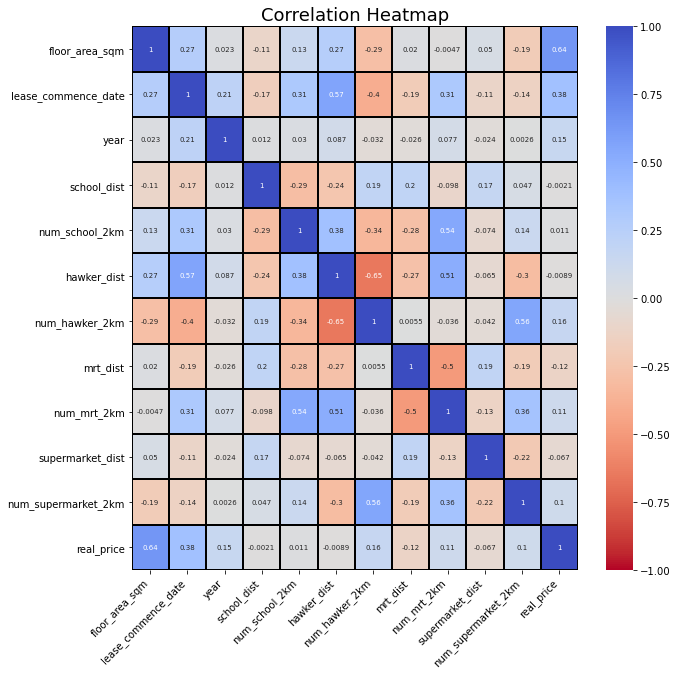

In [144]:
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(), annot = True, fmt='.2g', 
    vmin=-1, vmax=1, center= 0, cmap= 'coolwarm_r', linecolor='black', linewidth=1, annot_kws={"size": 7})
#ax.set_ylim(0 ,5)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Heatmap',size=18)
plt.show()

In [145]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['tolerance'] = 1/vif.VIF
    vif['meanVIF'] = vif.VIF.mean()

    return(vif)

,variables,VIF,tolerance,meanVIF
0,floor_area_sqm,19.553087,0.051143,7635.756532
1,lease_commence_date,42220.771458,0.000024,7635.756532
2,year,41679.180004,0.000024,7635.756532
3,school_dist,4.454457,0.224494,7635.756532
4,num_school_2km,13.828791,0.072313,7635.756532
5,hawker_dist,9.799285,0.102048,7635.756532
6,num_hawker_2km,5.089718,0.196475,7635.756532
7,mrt_dist,5.021455,0.199145,7635.756532
8,num_mrt_2km,7.748557,0.129056,7635.756532
9,supermarket_dist,4.378582,0.228384,7635.756532


In [148]:
calc_vif(df.drop(['real_price','num_supermarket_2km','year','num_school_2km'],axis=1).select_dtypes(include=['int64','float64'])).sort_values(by="VIF",ascending=False)

,variables,VIF,tolerance,meanVIF
1,lease_commence_date,35.668268,0.028036,10.521816
0,floor_area_sqm,19.066222,0.052449,10.521816
3,hawker_dist,7.770534,0.128691,10.521816
5,mrt_dist,5.008484,0.199661,10.521816
6,num_mrt_2km,4.647572,0.215166,10.521816
7,supermarket_dist,4.136627,0.241743,10.521816
2,school_dist,4.130596,0.242096,10.521816
4,num_hawker_2km,3.746226,0.266935,10.521816


#### Create region column using town of HDB

In [ ]:
d_region = {'ANG MO KIO':'North East', 'BEDOK':'East', 'BISHAN':'Central', 'BUKIT BATOK':'West', 'BUKIT MERAH':'Central',
       'BUKIT PANJANG':'West', 'BUKIT TIMAH':'Central', 'CENTRAL AREA':'Central', 'CHOA CHU KANG':'West',
       'CLEMENTI':'West', 'GEYLANG':'Central', 'HOUGANG':'North East', 'JURONG EAST':'West', 'JURONG WEST':'West',
       'KALLANG/WHAMPOA':'Central', 'MARINE PARADE':'Central', 'PASIR RIS':'East', 'PUNGGOL':'North East',
       'QUEENSTOWN':'Central', 'SEMBAWANG':'North', 'SENGKANG':'North East', 'SERANGOON':'North East', 'TAMPINES':'East',
       'TOA PAYOH':'Central', 'WOODLANDS':'North', 'YISHUN':'North'}
df['region'] = df['town'].map(d_region)

In [162]:
# drop columns to prepare data for linear regression
lr_df = df.drop(['num_supermarket_2km','year','num_school_2km','flat_model','storey_range','town'], axis=1)

In [174]:
# remove flat types with very few cases
df = df[~df['flat_type'].isin(['MULTI-GENERATION', '1 ROOM'])]
lr_df = lr_df[~lr_df['flat_type'].isin(['MULTI-GENERATION', '1 ROOM'])]

In [176]:
# Label encode flat type
replace_values = {'2 ROOM':0, '3 ROOM':1, '4 ROOM':2, '5 ROOM':3, 'EXECUTIVE':4}
df = df.replace({'flat_type': replace_values})
lr_df = lr_df.replace({'flat_type': replace_values})

In [ ]:
## dummy encoding
df = pd.get_dummies(df, columns=['region'], prefix=['region'], drop_first=True) # central is baseline (dropped)
lr_df = pd.get_dummies(lr_df, columns=['region'], prefix=['region'], drop_first=True) # central is baseline (dropped)

In [191]:
# Delete HDB transactions with real_price = Null
lr_df = lr_df[lr_df["real_price"].notnull()]

In [192]:
lr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193121 entries, 0 to 195050
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   floor_area_sqm       193121 non-null  float64
 1   lease_commence_date  193121 non-null  float64
 2   school_dist          193121 non-null  float64
 3   hawker_dist          193121 non-null  float64
 4   num_hawker_2km       193121 non-null  float64
 5   mrt_dist             193121 non-null  float64
 6   num_mrt_2km          193121 non-null  float64
 7   supermarket_dist     193121 non-null  float64
 8   flat_type            193121 non-null  int64  
 9   real_price           193121 non-null  float64
 10  region_East          193121 non-null  uint8  
 11  region_North         193121 non-null  uint8  
 12  region_North East    193121 non-null  uint8  
 13  region_West          193121 non-null  uint8  
dtypes: float64(9), int64(1), uint8(4)
memory usage: 16.9 MB


### Standardize data

In [203]:
# Scaling is only done for linear regression to increase performance

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit to continuous columns and transform
scaled_columns = ['floor_area_sqm','lease_commence_date','school_dist','hawker_dist','num_hawker_2km', 'mrt_dist', 'num_mrt_2km', 'supermarket_dist']
scaler.fit(lr_df[scaled_columns])
scaled_columns = pd.DataFrame(scaler.transform(lr_df[scaled_columns]), index=lr_df.index, columns=scaled_columns)

# separate unscaled features
unscaled_columns = lr_df.drop(scaled_columns, axis=1)

# concatenate scaled and unscaled features
lr_df = pd.concat([scaled_columns,unscaled_columns], axis=1)

In [182]:
lr_df.head()

,floor_area_sqm,lease_commence_date,school_dist,hawker_dist,num_hawker_2km,mrt_dist,num_mrt_2km,supermarket_dist,flat_type,real_price,region_East,region_North,region_North East,region_West
0,-2.147153,-0.542182,-0.922968,-0.676468,-0.118943,1.563509,-0.807498,0.144576,0,230799.767354,0,0,1,0
1,-2.188247,-1.029737,-0.158096,-1.027020,-0.118943,-0.608953,-0.807498,-0.046026,0,244647.753395,0,0,1,0
2,-1.202002,-1.029737,0.468449,-0.502777,-0.118943,0.189517,-0.807498,1.372904,1,290807.706866,0,0,1,0
3,-1.243095,-0.704700,0.618982,-1.034627,0.585053,1.579064,-0.471281,1.648218,1,295423.702213,0,0,1,0
4,-1.243095,-1.029737,0.037191,-0.505946,-0.118943,1.032059,-0.807498,2.246498,1,296346.901282,0,0,1,0


### Linear Regression

In [195]:
from sklearn.linear_model import LinearRegression

lr_y = lr_df[['real_price']]
lr_X = lr_df.drop(['real_price'], axis=1)

lin_reg = LinearRegression()
lin_reg.fit(lr_X, np.log(lr_y))

print([i for i in lr_df.columns if i != "real_price"])
print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(lr_X, np.log(lr_y))}')

['floor_area_sqm', 'lease_commence_date', 'school_dist', 'hawker_dist', 'num_hawker_2km', 'mrt_dist', 'num_mrt_2km', 'supermarket_dist', 'flat_type', 'region_East', 'region_North', 'region_North East', 'region_West']
Coefficients: [[ 0.18297276  0.13947661  0.01103427 -0.07428835  0.03755255 -0.03518216
  -0.01736357 -0.01093176  0.05117078 -0.1644015  -0.34233515 -0.14263317
  -0.21272694]]
Intercept: [12.98626913]
R^2 score: 0.8142271692886205


<b> It appears that region (central used as baseline, hence negative correlation coefficient for North, North East and West), floor area and Lease commencement date are positive drivers of resale prices, assuming a linear relationship between the independent variables and real prices. </b>

### Ridge regression

In [198]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1)
model.fit(lr_X, np.log(lr_y))

print([i for i in lr_df.columns if i != "real_price"])
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'R^2 score: {model.score(lr_X, np.log(lr_y))}')
                    

['floor_area_sqm', 'lease_commence_date', 'school_dist', 'hawker_dist', 'num_hawker_2km', 'mrt_dist', 'num_mrt_2km', 'supermarket_dist', 'flat_type', 'region_East', 'region_North', 'region_North East', 'region_West']
Coefficients: [[ 0.18296377  0.13947399  0.01103448 -0.07428877  0.03756816 -0.03518017
  -0.01735605 -0.01093222  0.05117999 -0.1643461  -0.34226229 -0.14257937
  -0.21266227]]
Intercept: [12.98620004]
R^2 score: 0.8142271661380918


### Random Forest

In [211]:
# Delete HDB transactions with real_price = Null
df = df[df["real_price"].notnull()]

In [212]:
from sklearn.model_selection import train_test_split

# Train Test Split
y = df[['real_price']]
X = df.drop(['real_price','town', 'year','storey_range','flat_model'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, shuffle=True, random_state=0)
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (173808, 15)
Shape of X_test: (19313, 15)
Shape of y_train: (173808, 1)
Shape of y_test: (19313, 1)


In [215]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from scipy.stats import spearmanr, pearsonr

# Validation using out-of-bag method
rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=20)
rf.fit(X_train, y_train)
predicted_train = rf.predict(X_train)

print(f'Out-of-bag R\u00b2 score estimate: {rf.oob_score_:>5.3}')

<ipython-input-215-e8f93b245007>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Out-of-bag R² score estimate: 0.927


In [216]:
# predict and get evaluation metrics on test set
predicted_test = rf.predict(X_test)
oob_test_score = r2_score(y_test['real_price'], predicted_test)
spearman = spearmanr(y_test['real_price'], predicted_test)
pearson = pearsonr(y_test['real_price'], predicted_test)
oob_mae = mean_absolute_error(y_test['real_price'], predicted_test)

print(f'Test data R\u00b2 score: {oob_test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')
print(f'Test data Mean Absolute Error: {round(oob_mae)}')

Test data R² score: 0.929
Test data Spearman correlation: 0.963
Test data Pearson correlation: 0.964
Test data Mean Absolute Error: 27687.0


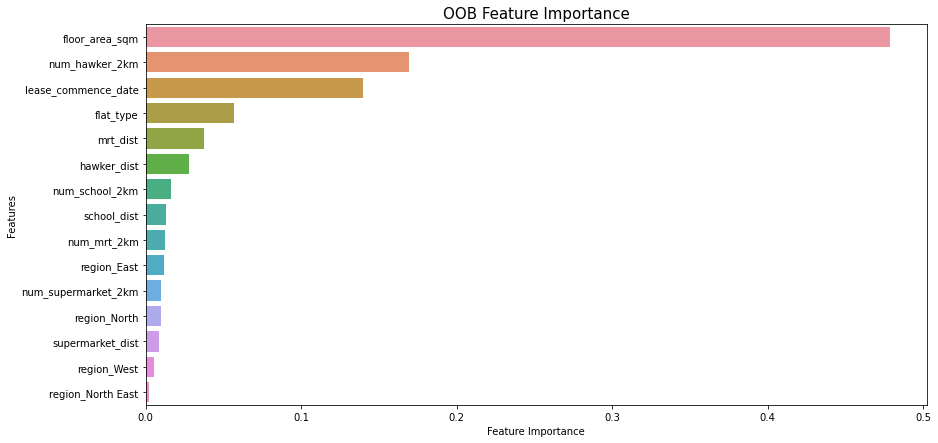

In [221]:
fig = plt.figure(figsize=(14,7))

ax1 = plt.plot()
feat_imp = pd.DataFrame({'Features': X_train.columns, 'Feature Importance': rf.feature_importances_}).sort_values('Feature Importance', ascending=False)
sns.barplot(y='Features', x='Feature Importance', data=feat_imp)
#plt.xticks(rotation=45, ha='right')
plt.title('OOB Feature Importance', size=15)
plt.show()